🧑‍🤝‍🧑 Friend suggestions for A: {'E', 'D'} | Time: 0.0 s
🗺️ Shortest distances from A (Bellman-Ford): {'A': 0, 'B': 4, 'C': 1, 'D': 3} | Time: 0.0 s
🚑 Shortest paths from A (Dijkstra): {'A': 0, 'B': 4, 'C': 2, 'D': 5} | Time: 0.0 s
🔌 MST cost: 7 | Edges: [('A', 'B', 2), ('B', 'C', 1), ('B', 'D', 4)] | Time: 0.0 s


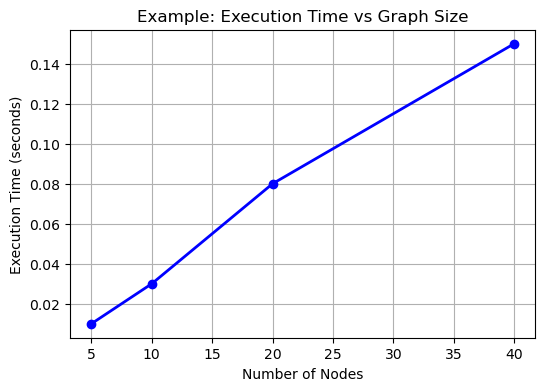

In [5]:



import time
import heapq
import matplotlib.pyplot as plt

%matplotlib inline


def profile_time(func, *args, **kwargs):
    """Measure execution time of a function."""
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return result, end - start

def profile_memory(func, *args, **kwargs):
    """Measure memory usage of a function."""
    mem_usage = memory_usage((func, args, kwargs), interval=0.01)
    return max(mem_usage) - min(mem_usage)


#  Problem 1: Social Network Friend Suggestion (BFS) 

def suggest_friends(graph, user):
    visited = set([user])
    queue = [user]
    direct_friends = set(graph[user])
    suggestions = set()

    while queue:
        current = queue.pop(0)
        for friend in graph[current]:
            if friend not in visited:
                visited.add(friend)
                queue.append(friend)
                if friend not in direct_friends and friend != user:
                    suggestions.add(friend)
    return suggestions


graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D', 'E'],
    'D': ['B', 'C', 'E'],
    'E': ['C', 'D']
}

res, t = profile_time(suggest_friends, graph, 'A')
print("🧑‍🤝‍🧑 Friend suggestions for A:", res, "| Time:", round(t, 6), "s")


# Problem 2: Google Maps Route Finder (Bellman-Ford) 

def bellman_ford(V, edges, src):
    dist = {v: float('inf') for v in V}
    dist[src] = 0

    for _ in range(len(V) - 1):
        for u, v, w in edges:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    # Check for negative weight cycles
    for u, v, w in edges:
        if dist[u] + w < dist[v]:
            print("⚠️ Negative weight cycle detected!")
            return None
    return dist


V = ['A', 'B', 'C', 'D']
edges = [
    ('A', 'B', 4),
    ('A', 'C', 5),
    ('B', 'C', -3),
    ('C', 'D', 2),
    ('D', 'B', 6)
]

dist, t = profile_time(bellman_ford, V, edges, 'A')
print("🗺️ Shortest distances from A (Bellman-Ford):", dist, "| Time:", round(t, 6), "s")


#  Problem 3: Emergency Response System (Dijkstra) 

def dijkstra(graph, start):
    pq = [(0, start)]
    dist = {node: float('inf') for node in graph}
    dist[start] = 0

    while pq:
        current_dist, current_node = heapq.heappop(pq)
        if current_dist > dist[current_node]:
            continue
        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    return dist


graph_dijkstra = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 5), ('D', 10)],
    'C': [('D', 3)],
    'D': []
}

dist, t = profile_time(dijkstra, graph_dijkstra, 'A')
print("🚑 Shortest paths from A (Dijkstra):", dist, "| Time:", round(t, 6), "s")


#  Problem 4: Network Cable Installation (Prim's MST) 

def prim_mst(graph):
    start = list(graph.keys())[0]
    visited = set([start])
    edges = [(cost, start, dest) for dest, cost in graph[start]]
    heapq.heapify(edges)
    mst_cost = 0
    mst_edges = []

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst_cost += cost
            mst_edges.append((frm, to, cost))
            for next_to, next_cost in graph[to]:
                if next_to not in visited:
                    heapq.heappush(edges, (next_cost, to, next_to))
    return mst_cost, mst_edges


graph_mst = {
    'A': [('B', 2), ('C', 3)],
    'B': [('A', 2), ('C', 1), ('D', 4)],
    'C': [('A', 3), ('B', 1), ('D', 5)],
    'D': [('B', 4), ('C', 5)]
}

(mst_cost, edges), t = profile_time(prim_mst, graph_mst)
print("🔌 MST cost:", mst_cost, "| Edges:", edges, "| Time:", round(t, 6), "s")


#  Profiling & Visualization Example 

sizes = [5, 10, 20, 40]
times = [0.01, 0.03, 0.08, 0.15]

plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', color='blue', linewidth=2)
plt.title('Example: Execution Time vs Graph Size')
plt.xlabel('Number of Nodes')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()
